In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def my_update_function(capital, exposure, total_exposure):
    return exposure if capital < exposure else (exposure - capital*exposure/total_exposure)

In [2]:
class LiabilityNetwork:
    
    def __init__(self, size):
        self.size = size
        self.liabilities = np.zeros((size, size))
#         self.update_function = my_update_function
        self.update_function = lambda capital, exposure, total_exposure: exposure if capital < exposure else (exposure - capital*exposure/total_exposure)

    def step(self):
        # Randomly select defaulted institution
        default = np.random.randint(self.size)
        
        # Remove capital from default
        self.liabilities[default, default] = 0
        
        # Calculate if bailed out
        bailout = np.random.randint(2)
        
        # TODO: handle bailout

        # Get defaults
        defaults = [i for i in range(self.size) if self.liabilities[i, i] == 0]
        num_defaults = -1  # just need an initial value to get into while loop
        while num_defaults != 0:  # iterate until "stable"
            num_defaults = 0
            for i in range(self.size):
                capital = self.liabilities[i, i]
                total_exposure = self.liabilities[i, :].sum() - capital
                defaulted = capital == 0 or any([(capital - self.liabilities[i, j]) < 0 for j in defaults])

                if not defaulted:
                    for j in range(self.size):
                        if j in defaults:
                            pass
                        else:
                            exposure = self.liabilities[i, j]
                            self.liabilities[i, j] = self.update_function(capital, exposure, total_exposure)
                else:
                    self.liabilities[i, i] = 0
                    defaults.append(i)
                    num_defaults += 1
        return defaults

In [10]:
class SimpleNetwork:
    
    def __init__(self, size, liabilities=None, recovery_rate=0.0):
        self.size = size
        self.liabilities = liabilities if liabilities is not None else np.zeros((size, size))
        self.recovery_rate = recovery_rate

    def default(self, i):
        self.liabilities[i, i] = 0

    def recover(self, i):
        for j in range(self.size):
            if i != j:
                self.liabilities[j, j] += self.recovery_rate * self.liabilities[j, i]
                self.liabilities[j, i] = 0

    def step(self):
        for i in range(self.size):
            capital = self.liabilities[i, i]
            assets = self.liabilities[i, :].sum()
            liabilities = self.liabilities[:, i].sum()
            net = capital + assets - liabilities
            print(i, assets, liabilities, capital, net)
            if net < 0:
                self.default(i)
                self.recover(i)

    def show(self):
        plt.imshow(self.liabilities, cmap='hot', interpolation='nearest')
        plt.show()

In [11]:
test_liabilities = np.zeros((3, 3))
test_liabilities[0, 0] = 1
test_liabilities[0, 1] = 4
test_liabilities[1, 1] = 1
test_liabilities[1, 2] = 1
test_liabilities[2, 0] = 5
test_liabilities[2, 2] = 2

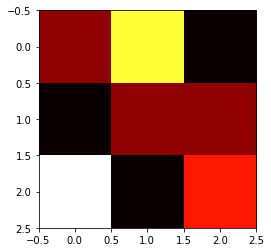

In [12]:
sn = SimpleNetwork(3, test_liabilities)
sn.show()

(0, 5.0, 6.0, 1.0, 0.0)
(1, 2.0, 5.0, 1.0, -2.0)
(2, 7.0, 3.0, 2.0, 6.0)


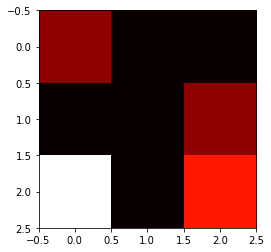

In [13]:
sn.step()
sn.show()